In [1]:
!pip install python-igraph
!pip install matplotlib
!pip install seaborn
from igraph import *
import igraph
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import seaborn as sns

You should consider upgrading via the '/home/quinten/.anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/quinten/.anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/quinten/.anaconda3/bin/python -m pip install --upgrade pip' command.
/home/quinten/.anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ## Download alle snapshots (uncomment degene die ge nodig hebt)
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jul_19.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/mar_21.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/may_20.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/sep_18.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/nov_17.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17_sample.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jul_19_sample.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/mar_21_sample.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/may_20_sample.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/sep_18_sample.txt
# !wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/nov_17_sample.txt

In [2]:
!ls snapshots

jan_17_sample.txt  mar_21_sample.txt  nov_17_sample.txt       sep_18.txt
jan_17.txt	   mar_21.txt	      nov_17.txt
jul_19_sample.txt  may_20_sample.txt  proposal_structure.txt
jul_19.txt	   may_20.txt	      sep_18_sample.txt


In [2]:
# jan_17.txt nov_17.txt sep_18.txt jul_19.txt may_20.txt mar_21.txt  
file = "mar_21.txt"
g = Graph.Read_Ncol("snapshots/"+file, directed=True)

In [3]:
# Load whale addresses and their info
whales_addr = set()
with open("top_1000_addresses.txt","r") as f:
    while True:
        line = f.readline()[:-1]
        if not line:
            break
        whales_addr.add(line)

locations = dict()
names = dict()
types = dict()
balances = dict()
with open("whales_information.txt",'r') as f:
    lines = f.readlines()
    for line in lines:
        s = line.split(" ")
        names[s[0]] = s[1]
        locations[s[0]] = s[2]
        types[s[0]] = s[3]
        balances[s[0]] = int(s[4].replace("\n",""))
print("End of file.")

End of file.


In [4]:
# Create graph
whales = [n for n in g.vs() if n["name"] in whales_addr]
not_whales = [n for n in g.vs() if n["name"] not in whales_addr]

# Find whales and their neighbors + create subgraph
whales_neighborhood = set(whales)
for w in whales:
    whales_neighborhood = whales_neighborhood.union(g.neighbors(w))
whales_subgraph = g.subgraph(whales_neighborhood)
only_whales_subgraph = g.subgraph(whales)

# Visualize whales
layout = only_whales_subgraph.layout(layout='fr')
visual_style = {}

visual_style["vertex_size"] = [0.04+0.1*math.sqrt(balances[n["name"]]-900) for n in only_whales_subgraph.vs()]
max_weight = math.log(max(only_whales_subgraph.es["weight"]))

for n in only_whales_subgraph.vs():
    if types[n["name"]] == "Exchange":
        n["color"] = "rgba(235,103,52,1)"
    elif types[n["name"]] == "Finance":
        n["color"] = "rgba(57,77,164,1)"    
    elif types[n["name"]] == "Token":
        n["color"] = "rgba(191, 63, 191,1)"
    elif types[n["name"]] == "Mining":
        n["color"] = "rgba(92, 169, 44,1)"
    elif types[n["name"]] == "Unknown":
        n["color"] = "rgba(200,200,200,1)"
    else:
        print("Unknown type: "+types[n["name"]])
     

# Scale edge_widths logarithmically to suppress large ranges
# visual_style["edge_width"] = [1+(5.0*math.log(weight)/max_weight) for weight in g.es["weight"]]
visual_style["edge_width"] = [3]
visual_style["edge_arrow_size"] = 0.2
visual_style["layout"] = layout
visual_style["bbox"] = (800, 800)
visual_style["margin"] = 40
visual_style["node_color"] = "blue"
plot(only_whales_subgraph,**visual_style, target='plots/plot.pdf',edge_color="rgba(0,0,0,1)")
print("Wrote graph plot to plot.pdf")

Wrote graph plot to plot.pdf


## Community detection

In [62]:
# jan_17.txt nov_17.txt sep_18.txt jul_19.txt may_20.txt mar_21.txt  
# num_eigenvector = []
# mod_eigenvector = []
# num_louvain = []
# mod_louvain = []
num_leiden = []
mod_leiden = []

for file in ["jan_17.txt", "nov_17.txt", "sep_18.txt", "jul_19.txt", "may_20.txt", "mar_21.txt"]:  
    g = Graph.Read_Ncol(file, directed=True)
    print(file)
    
    # lead = g.community_leading_eigenvector(clusters=100)
    # num_eigenvector.append(len(lead))
    # mod_eigenvector.append(lead.modularity)

    # lvn = g.as_undirected().community_multilevel(weights=None)
    # num_louvain.append(len(lvn))
    # mod_louvain.append(lvn.modularity)

    leiden = g.as_undirected().community_leiden(objective_function="modularity",n_iterations=10)
    num_leiden.append(len(leiden))
    mod_leiden.append(leiden.modularity)

jan_17.txt
nov_17.txt
sep_18.txt
jul_19.txt
may_20.txt
mar_21.txt


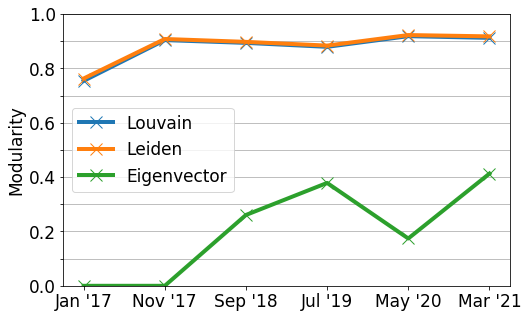

In [58]:
plt.rcParams.update({'font.size': 17})
plt.plot(range(6),mod_louvain,linestyle="-",marker="x",linewidth=4,markersize=12)
plt.plot(range(6),mod_leiden,linestyle="-",marker="x",linewidth=4,markersize=12)
plt.plot(range(6),mod_eigenvector,linestyle="-",marker="x",linewidth=4,markersize=12)
plt.legend(labels=["Louvain","Leiden","Eigenvector"])
plt.yticks([t/10 for t in range(0,11)],[str(x) if 100*x%20==0 else "" for x in[t/10 for t in range(0,11)]])
plt.grid(axis="y")
plt.xticks(range(6),["Jan '17", "Nov '17", "Sep '18", "Jul '19", "May '20", "Mar '21"])
plt.ylabel("Modularity")
plt.ylim(0,1)
f = plt.gcf()
f.set_size_inches(8,5)
plt.savefig("plots/clusters_modularity.pdf",bbox_inches="tight")

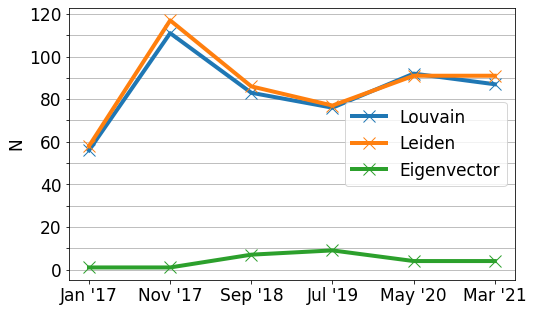

In [59]:
plt.rcParams.update({'font.size': 17})
plt.plot(range(6),num_louvain,linestyle="-",marker="x",linewidth=4,markersize=12)
plt.plot(range(6),num_leiden,linestyle="-",marker="x",linewidth=4,markersize=12)
plt.plot(range(6),num_eigenvector,linestyle="-",marker="x",linewidth=4,markersize=12)
plt.legend(labels=["Louvain","Leiden","Eigenvector"])
plt.xticks(range(6),["Jan '17", "Nov '17", "Sep '18", "Jul '19", "May '20", "Mar '21"])
plt.ylabel("N")
plt.yticks(range(0,130,10),[str(x) if x%20==0 else "" for x in range(0,130,10) ])
plt.grid(axis="y")
f = plt.gcf()
f.set_size_inches(8,5)
plt.savefig("plots/clusters_num.pdf",bbox_inches="tight")

In [5]:
lead = g.community_leading_eigenvector(clusters=90)
print(lead.modularity)

0.4127733486595691
/home/quinten/.anaconda3/lib/python3.7/site-packages/igraph/__init__.py:1280: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  self, clusters, **kwds


In [114]:
# # Visualize clusters in different colors
# g = Graph.Read_Ncol("snapshots/mar_21_sample.txt", directed=True)

# leiden = g.as_undirected().community_leiden(objective_function="modularity",n_iterations=2,resolution_parameter=1)
# print(len(leiden))
# print(leiden.modularity)

# layout = g.layout(layout='lgl')

visual_style = {}

import random
cols = []
for x in range(10):
    cols.append("rgba({},{},{},255)".format(round(random.random()*255),round(random.random()*255),round(random.random()*255)))

for i in range(10):
    for n in list(reversed(sorted(leiden,key=lambda l:len(l))))[i]:
        g.vs()[n]["color"] = cols[i]

print("Set colors")
visual_style["vertex_size"] = [10]     
visual_style["edge_width"] = [0.01]
# visual_style["edge_width"] = [3]
visual_style["edge_arrow_size"] = 0.0001
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 40
#mark_groups = lead or walktrap_cl or communities
# plot(g,**visual_style, target='plots/plot.pdf',edge_color="rgba(0,0,0,0.1)",mark_groups=lvn)
plot(g,**visual_style, target='plots/plot.pdf',edge_color="rgba(0,0,0,0)")
print("Wrote graph plot to plot.pdf")

Set colors
Wrote graph plot to plot.pdf


In [115]:
cols

['rgba(96,163,90,255)',
 'rgba(182,158,9,255)',
 'rgba(1,72,113,255)',
 'rgba(205,152,45,255)',
 'rgba(49,120,217,255)',
 'rgba(50,84,84,255)',
 'rgba(182,30,160,255)',
 'rgba(46,185,94,255)',
 'rgba(172,94,65,255)',
 'rgba(198,165,213,255)']